In [1]:
# ignore this
%load_ext music21.ipython21

# User's Guide, Chapter 15: Keys and KeySignatures

(to be written)

In [2]:
from music21 import *

A Key object is derived from a KeySignature object.

In [3]:
k = key.Key('E-')
k.classes

('Key',
 'KeySignature',
 'DiatonicScale',
 'ConcreteScale',
 'Scale',
 'Music21Object',
 'object')

It also has everything that a Scale can do.  Which is nice, because we can realize...

## Example: Prepare a vocal exercise in all major keys, ascending by step.

*requires v3 or higher*

Let's create a simple exercise in playing or singing thirds.  I think I remember this from the [First Division Band Method](https://www.google.com/search?q=First+Division+Band+Method&tbm=isch) "Blue Book": 

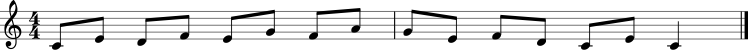

In [4]:
pitchStream = converter.parse("tinyNotation: 4/4 c8 e d f e g f a g e f d c e c4")
pitchStream.show()

This melody does not have a key associated with it.  Let's put a Key of C Major at the beginning of the piece:

In [5]:
k = key.Key('C')
pitchStream.measure(1).insert(0, k)

Note that putting the key of C into the Stream doesn't change what it looks like when we show the Stream, since there are no sharps or flats.  But when we transpose the `Key` object up 1 semitone, to D-flat major, it will show up:

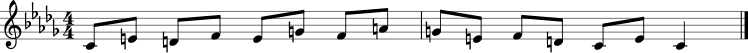

In [6]:
k.transpose(1, inPlace=True)
pitchStream.show()

Now the key signature is D-flat, but the notes are wrong, so we can transpose them also:

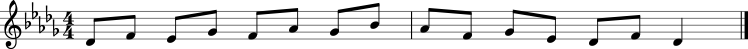

In [7]:
for n in pitchStream.recurse().notes:
    n.transpose(1, inPlace=True)
    
pitchStream.show()

Notice that we choose the semitone: